In [3]:
import numpy as np

V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

for _ in range(100):
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    V = new_V.copy()
    print(V)

{'L1': 0.0, 'L2': -0.5}
{'L1': -0.22499999999999998, 'L2': -0.725}
{'L1': -0.42749999999999994, 'L2': -0.9274999999999999}
{'L1': -0.6097499999999999, 'L2': -1.10975}
{'L1': -0.7737750000000001, 'L2': -1.273775}
{'L1': -0.9213975000000002, 'L2': -1.4213975}
{'L1': -1.05425775, 'L2': -1.55425775}
{'L1': -1.1738319750000001, 'L2': -1.6738319750000001}
{'L1': -1.2814487775, 'L2': -1.7814487775}
{'L1': -1.3783038997500001, 'L2': -1.8783038997500001}
{'L1': -1.4654735097750002, 'L2': -1.965473509775}
{'L1': -1.5439261587975002, 'L2': -2.0439261587975004}
{'L1': -1.61453354291775, 'L2': -2.11453354291775}
{'L1': -1.6780801886259753, 'L2': -2.1780801886259753}
{'L1': -1.735272169763378, 'L2': -2.2352721697633777}
{'L1': -1.7867449527870403, 'L2': -2.28674495278704}
{'L1': -1.833070457508336, 'L2': -2.3330704575083363}
{'L1': -1.8747634117575025, 'L2': -2.3747634117575025}
{'L1': -1.9122870705817523, 'L2': -2.412287070581752}
{'L1': -1.9460583635235769, 'L2': -2.446058363523577}
{'L1': -1.9764

In [4]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

cnt = 0
while True:
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

    delta = max(abs(new_V['L1'] - V['L1']), abs(new_V['L2'] - V['L2']))
    V = new_V.copy()
    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


In [5]:
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0
while True:
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(V['L1'] - t)
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(V['L2'] - t))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


In [6]:
import common.gridworld_render as render_helper


class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        self.reward_map = np.array([
            [0, 0, 0, 1],
            [0, None, 0, -1],
            [0, 0, 0, 0]
        ])
        self.goal_state = (0, 3)
        self.wall_state = (1, 1)
        self.agent_state = self.start_state = (2, 0)

    @property
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

    def next_state(self, state, action):
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        move = action_move_map[action]
        next_state = (state[0] + move[0], state[1] + move[1])
        ny, nx = next_state

        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state
        if next_state == self.wall_state:
            next_state = state
        return next_state

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]

    def render_v(self, v=None, policy=None, print_value=True):
        renderer = render_helper.Renderer(self.reward_map, self.goal_state,
                                          self.wall_state)
        renderer.render_v(v, policy, print_value)

In [7]:
env = GridWorld()

print(env.height)
print(env.width)
print(env.shape)

3
4
(3, 4)


In [8]:
for action in env.actions():
    print(action)
print("=======")
for state in env.states():
    print(state)

0
1
2
3
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


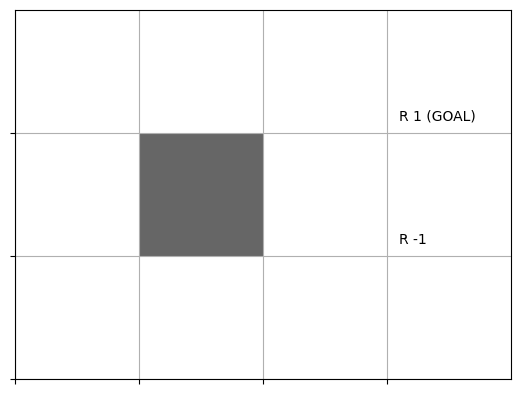

In [9]:
env = GridWorld()
env.render_v()

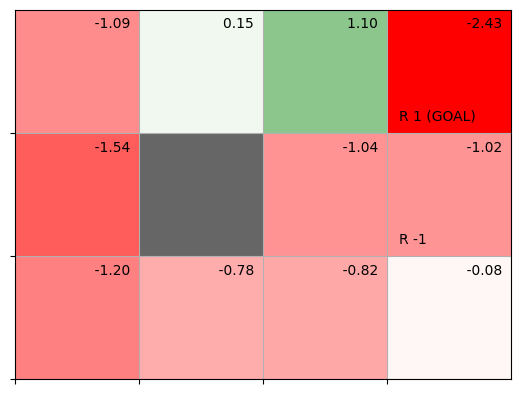

In [10]:
env = GridWorld()
V = {}
for state in env.states():
    V[state] = np.random.randn()
env.render_v(V)

In [11]:
from common.gridworld import GridWorld

env = GridWorld()
V = {}

for state in env.states():
    V[state] = 0

state = (1, 2)
print(V[state])

0


In [12]:
from collections import defaultdict
from common.gridworld import GridWorld

env = GridWorld()
V = defaultdict(lambda: 0)
state = (1, 2)
print(V[state])

0


In [13]:
pi = defaultdict(lambda: [0.25, 0.25, 0.25, 0.25])
state = (0, 1)
print(pi[state])

[0.25, 0.25, 0.25, 0.25]


In [14]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():
        if state == env.goal_state:
            V[state] = 0
            continue
        action_probs = pi[state]
        new_V = 0

        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            new_V += action_prob * (r + gamma * V[next_state])
        V[state] = new_V
    return V

In [15]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()
        V = eval_onestep(pi, V, env, gamma)

        delta = 0
        for state in V.keys():
            delta = max(delta, abs(V[state] - old_V[state]))
        if delta < threshold:
            break

    return V

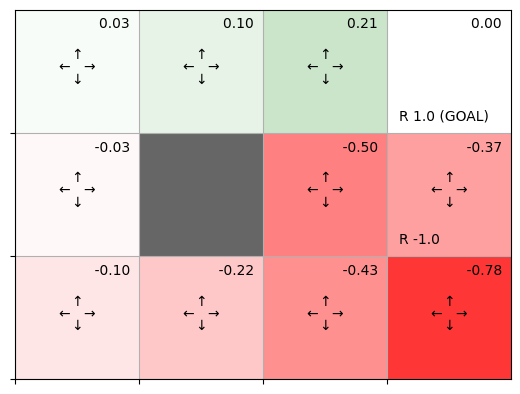

In [16]:
env = GridWorld()
gamma = 0.9

pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
V = defaultdict(lambda: 0)

V = policy_eval(pi, V, env, gamma)
env.render_v(V, pi)

In [17]:
def argmax(d):
    max_value = max(d.values())
    max_key = 0
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key


action_values = {0: 0.1, 1: -0.3, 2: 9.9, 3: -1.3}
max_action = argmax(action_values)
print(max_action)

2


In [18]:
def greedy_policy(V, env, gamma):
    pi = {}
    for state in env.states():
        action_values = {}
        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values[action] = value
        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs
    return pi

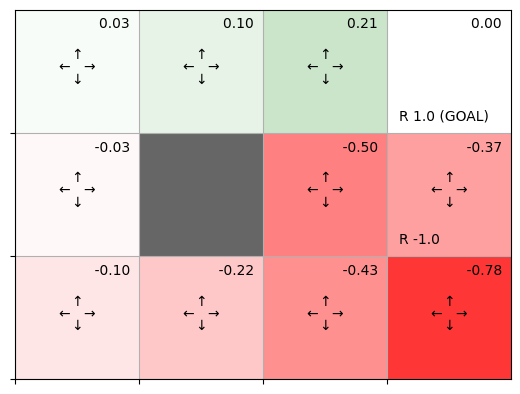

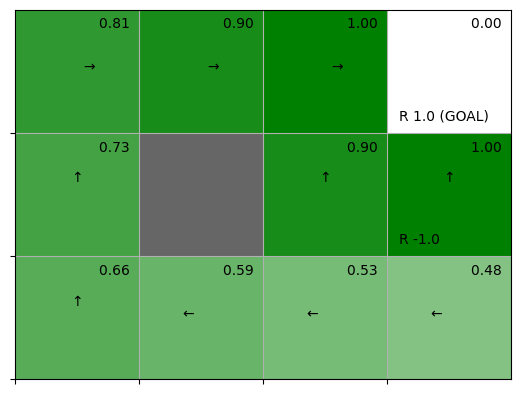

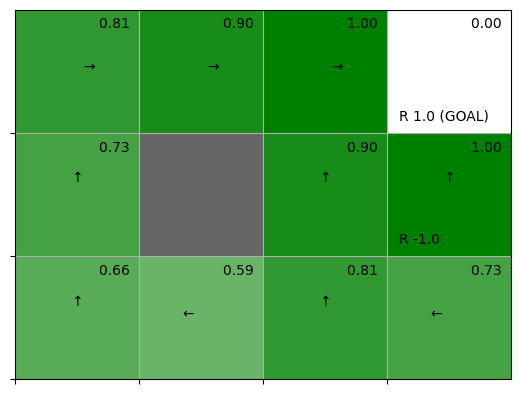

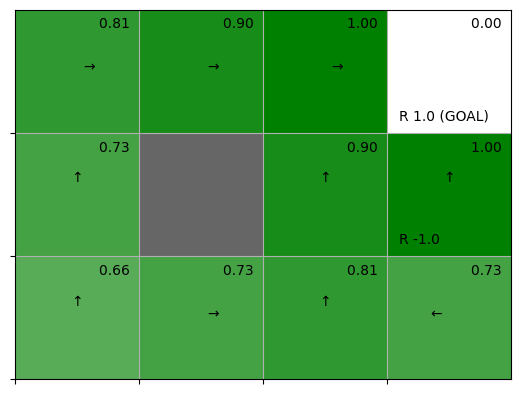

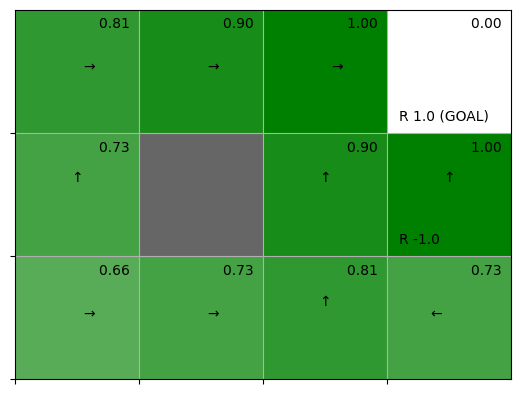

In [19]:
def policy_iter(env, gamma, threshold=0.001, is_render=False):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)
    while True:
        V = policy_eval(pi, V, env, gamma, threshold)
        new_pi = greedy_policy(V, env, gamma)

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:
            break
        pi = new_pi
    return pi

env = GridWorld()
gamma=0.9
pi = policy_iter(env, gamma, is_render=True)

In [20]:
def value_iter_onestep(V, env, gamma):
    for state in env.states():
        if state==env.goal_state:
            V[state]=0
            continue
        
        action_values = []
        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values.append(value)
        V[state] = max(action_values)
    return V

In [21]:
def value_iter(V, env, gamma, threshold=0.001, is_render=True):
    while True:
        if is_render:
            env.render_v(V)
            
        old_V = V.copy()
        V = value_iter_onestep(V, env, gamma)
        
        delta = 0
        for state in V.keys():
            delta = max(delta, abs(V[state]-old_V[state]))
        if delta < threshold:
            break
    return V

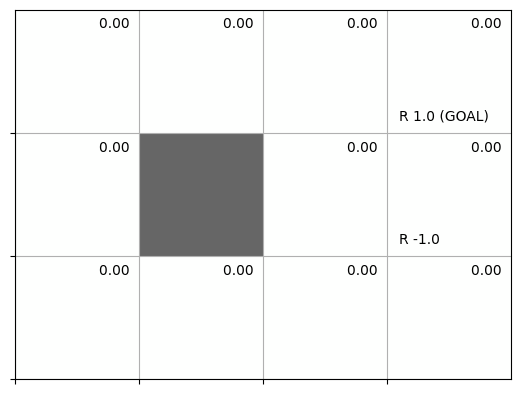

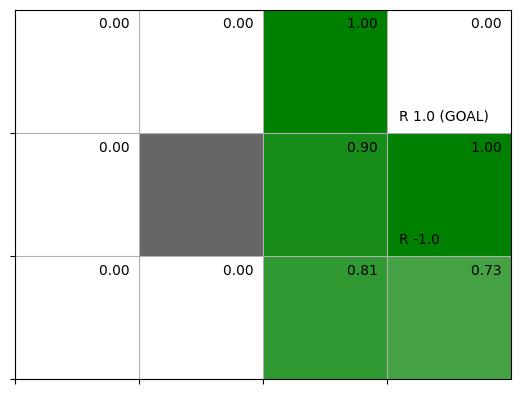

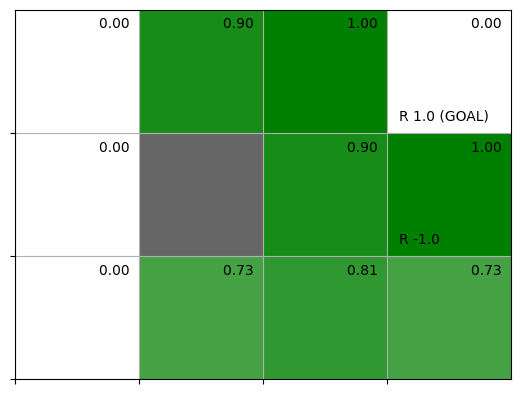

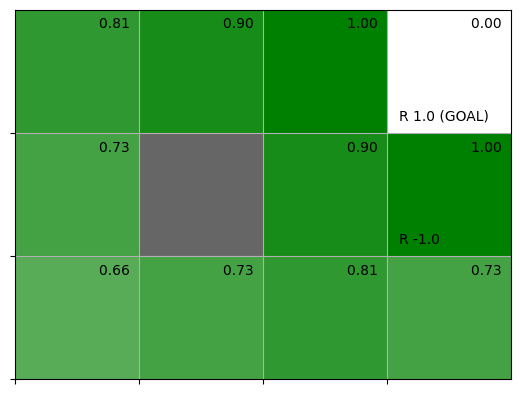

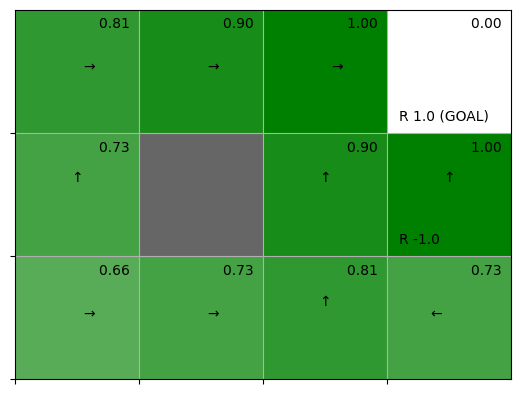

In [22]:
from common.gridworld import GridWorld

V = defaultdict(lambda :0)
env = GridWorld()
gamma = 0.9

V = value_iter(V, env, gamma)
pi = greedy_policy(V, env, gamma)
env.render_v(V, pi)